# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco to allow potential real estate investors to choose rental investment properties. 

In [1]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly_express as px
from pathlib import Path
from panel.interact import interact

%matplotlib inline

In [2]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_TOKEN")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
mean_number_housing_units = sfo_data.groupby(["year"]).mean()
mean_number_housing_units

sale_price_sqr_foot  housing_units  gross_rent
year                                                
2010           369.344353         372560        1239
2011           341.903429         374507        1530
2012           399.389968         376454        2324
2013           483.600304         378401        2971
2014           556.277273         380348        3528
2015           632.540352         382295        3739
2016           697.643709         384242        4390

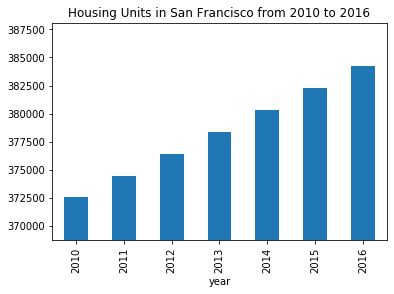

In [5]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
chart_title = "Housing Units in San Francisco from 2010 to 2016"
min = sfo_data["housing_units"].min() - sfo_data["housing_units"].std()
max = sfo_data["housing_units"].max() + sfo_data["housing_units"].std()
ylim = [min, max]

fig_housing_units = mean_number_housing_units["housing_units"].plot(kind="bar", title=chart_title, ylim=ylim)
fig_housing_units
plt.show()
plt.close()

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [6]:
# Calculate the average gross rent and average sale price per square foot
average_gross_rent = sfo_data.groupby(["year"]).mean()
average_gross_rent.drop(columns=["housing_units"], inplace=True) 
average_gross_rent

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

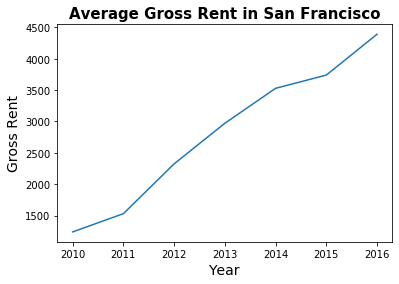

In [7]:
# Plot the Average Gross Rent per Year as a Line Chart 
plt.title('Average Gross Rent in San Francisco', fontsize=15, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel('Gross Rent', fontsize=14)
plt.plot(average_gross_rent["gross_rent"])
plt.show()

### Average Sales Price per Year

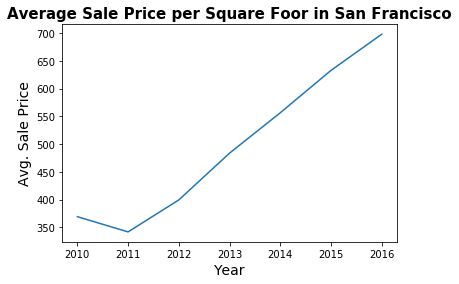

In [8]:
# Plot the Average Sales Price per Year as a line chart
chart_title = "Average Sale Price per Square Foor in San Francisco"
avg_price_per_sqft = sfo_data.groupby(["year"]).mean()
plt.title(chart_title, fontsize=15, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel('Avg. Sale Price', fontsize=14)
plt.plot(avg_price_per_sqft["sale_price_sqr_foot"]) 
plt.show()

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [9]:
# Group by year and neighborhood and then create a new dataframe of the mean values
avg_price_by_neighborhood = sfo_data.groupby(by=["neighborhood", "year"]).mean()
list_neighborhoods = sfo_data["neighborhood"].tolist()

In [10]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
def avg_price(neighborhood):
    df = avg_price_by_neighborhood.loc[neighborhood].drop(columns = ['housing_units', 'gross_rent'])
    return df.hvplot(
        title = f'Neighborhood: {neighborhood}',
        xlabel='Year',
        ylabel= 'Avg Sale Price per Square Foot')
interact(avg_price, neighborhood = list_neighborhoods)


Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive01319')

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [11]:
# Getting the data from the top 10 expensive neighborhoods
sfo_average_by_neighborhood = sfo_data.groupby(by=["neighborhood"]).mean()
sfo_average_by_neighborhood_descending = sfo_average_by_neighborhood.sort_values('sale_price_sqr_foot', ascending=False)
sfo_average_by_neighborhood_top10 = sfo_average_by_neighborhood_descending[:10].drop(columns = ['housing_units','gross_rent'])
sfo_average_by_neighborhood_top10

sale_price_sqr_foot
neighborhood                              
Union Square District           903.993258
Merced Heights                  788.844818
Miraloma Park                   779.810842
Pacific Heights                 689.555817
Westwood Park                   687.087575
Telegraph Hill                  676.506578
Presidio Heights                675.350212
Cow Hollow                      665.964042
Potrero Hill                    662.013613
South Beach                     650.124479

In [12]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_average_by_neighborhood_top10.hvplot(
    kind="bar",
    title="Top 10 Expensive Neighborhoods in SFO",
    rot = 90,
    xlabel = "Neighborhood",
    ylabel = "Avg Sale Price per Square Foot",
    height=400
    )

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

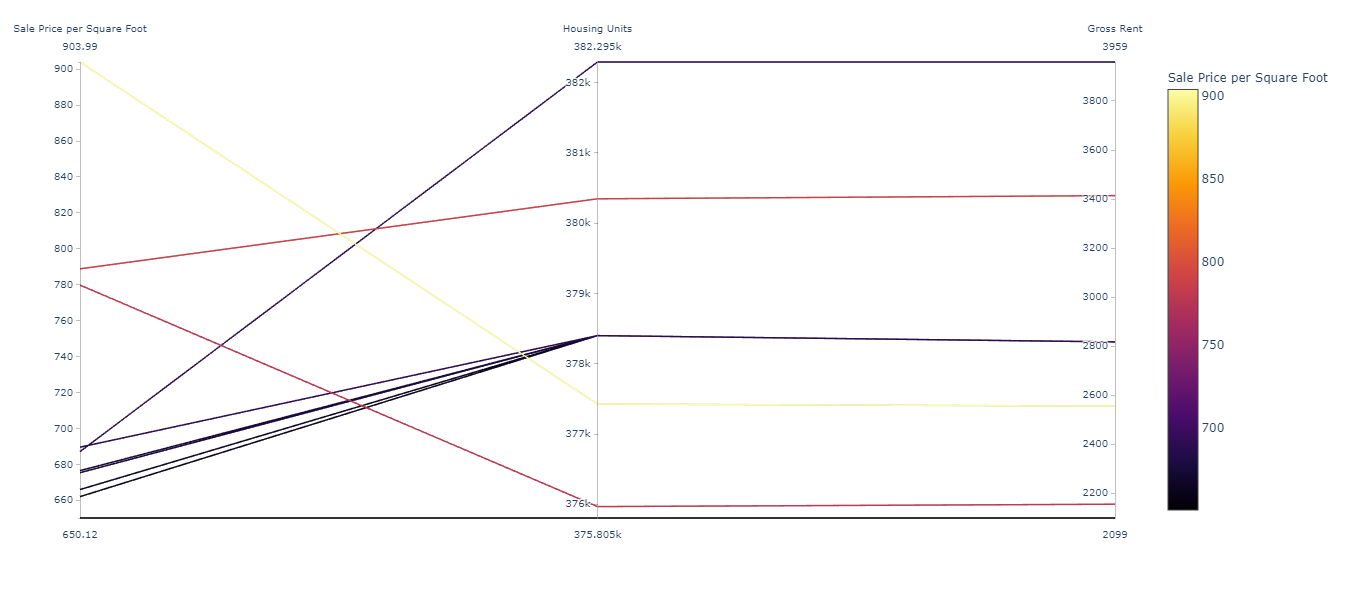

In [13]:
# Parallel Coordinates Plot
px.parallel_coordinates(
    sfo_average_by_neighborhood_descending[:10],
    dimensions=['sale_price_sqr_foot','housing_units','gross_rent'],
    color = 'sale_price_sqr_foot',
    color_continuous_scale=px.colors.sequential.Inferno,
     labels={
        "housing_units": "Housing Units",
        "gross_rent": "Gross Rent",
        "sale_price_sqr_foot": "Sale Price per Square Foot",
    },
)

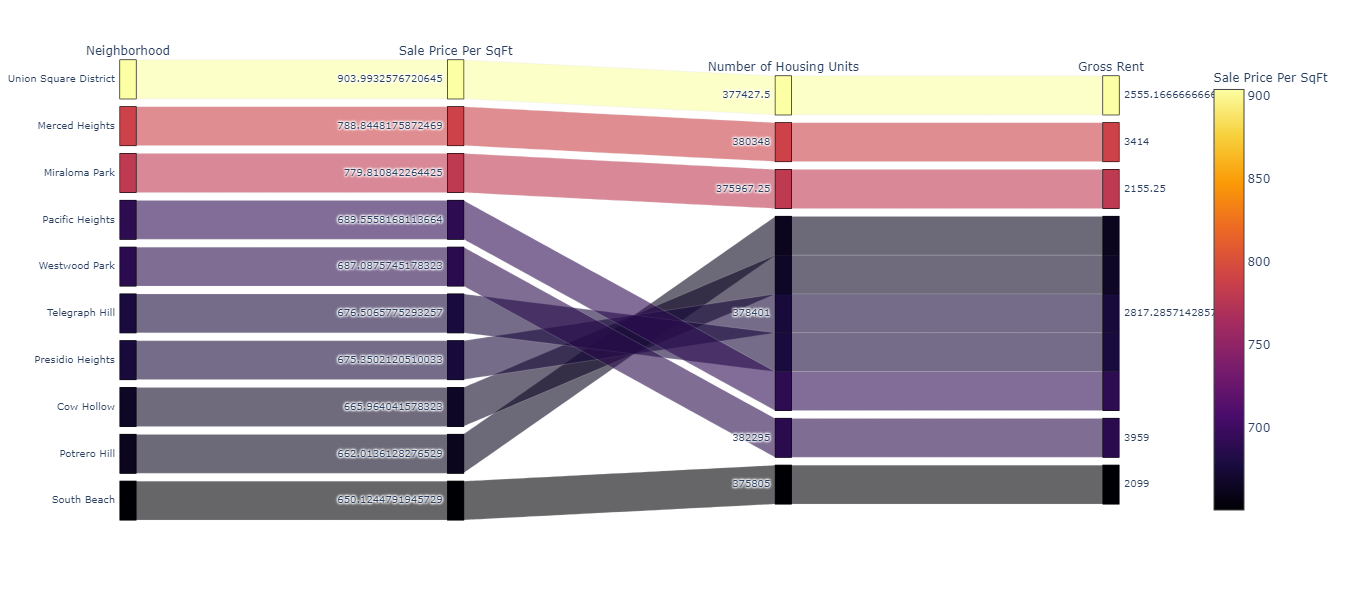

In [14]:
# Parallel Categories Plot

parallel_categories = px.parallel_categories(
sfo_average_by_neighborhood_descending[:10].reset_index(),
dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
color="sale_price_sqr_foot",
color_continuous_scale=px.colors.sequential.Inferno,
labels={
    "neighborhood": "Neighborhood",
    "sale_price_sqr_foot": "Sale Price Per SqFt",
    "housing_units": "Number of Housing Units",
    "gross_rent": "Gross Rent",
},
)
parallel_categories

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [15]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.set_index(['Neighborhood'], inplace=True)

### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [16]:
# Calculate the mean values for each neighborhood
sfo_average_by_neighborhood = sfo_data.groupby(by=["neighborhood"]).mean()
sfo_average_by_neighborhood.drop(columns=["housing_units"], inplace=True)

In [17]:
# Join the average values with the neighborhood locations
map_data = pd.concat([sfo_average_by_neighborhood,df_neighborhood_locations],axis=1, join='inner')
map_data.head()

sale_price_sqr_foot   gross_rent        Lat         Lon
Alamo Square               366.020712  2817.285714  37.791012 -122.402100
Anza Vista                 373.382198  3031.833333  37.779598 -122.443451
Bayview                    204.588623  2318.400000  37.734670 -122.401060
Bayview Heights            590.792839  3739.000000  37.728740 -122.410980
Buena Vista Park           452.680591  2698.833333  37.768160 -122.439330

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

In [ ]:
# Create a scatter mapbox to analyze neighborhood info
px.scatter_mapbox(map_data, lat="Lat", lon="Lon", color="gross_rent")


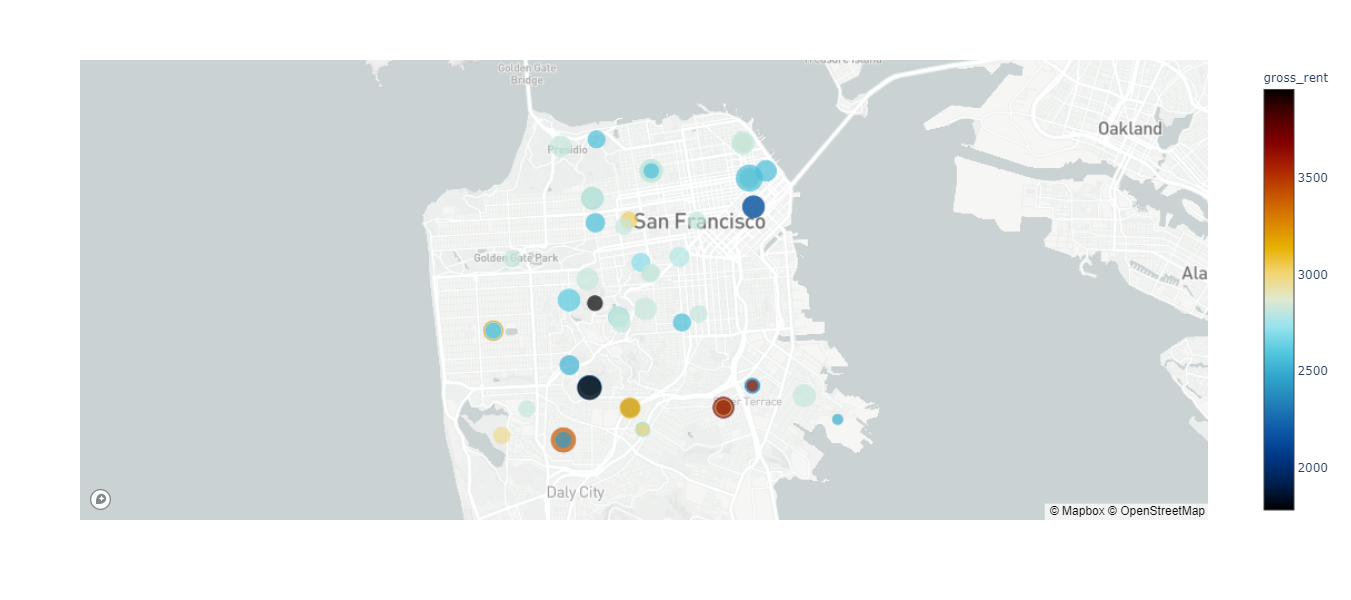

In [18]:
px.scatter_mapbox(
    map_data, 
    lat="Lat", 
    lon="Lon", 
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size="sale_price_sqr_foot",
    zoom = 11,
    width=1000)